<a href="https://colab.research.google.com/github/KhuramC/Fear-Lesson-Plans/blob/master/D1/D1.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Learning
Below is a more in depth 1-cell model of the amygdala. Here we will see how the amount of calcium present is imperative for the concept of learning within us. Remember, the tone is what is learned like the bell with Pavlov while the shock is equivalent to the food. For a refresher on the Pavlov experiment and how it works, watch the video below.

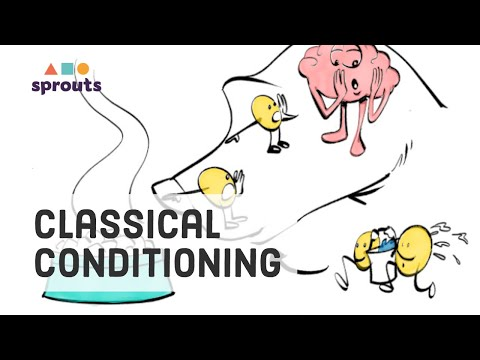

In [ ]:
#@title Run cell to load video

from IPython.display import YouTubeVideo
YouTubeVideo('jd7Jdug5SRc')

##The model is a PN cell with tone and shock inputs as shown below:

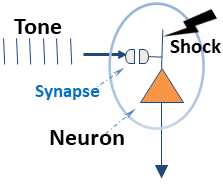



This model has more parameters available compared to last time. The frequencies and the shock start time are still present, but the initial weights are now also present. The orange lines are the 1000ms(1second) range in which shock will be administered. Shock wil always start on the first orange line, but not necessarily end on the last line. Any spikes that occur outside the orange lines are caused by just tone.

---
CHALLENGE - Adjust the 7 given parameters to ensure that the tone weight grows enough(i.e the cell learns) for the cell to spike just with tone, i.e. spike after the second orange line. There must be no spikes before the first orange line.

Hints:
*   This cell model is very similar to the one in D1.2, so lessons from there can be applied to this one as well.
*   It might be a good idea to make sure that the shock is strong enough to trigger spikes on its own before anything else.





In [2]:
#@title Run cell to activate model
import os
import numpy as np
from os.path import normpath, sep, join

RunningInCOLAB = 'google.colab' in str(get_ipython())
print("Downloading model this will only take a min")
if RunningInCOLAB:
    !pip install ipywidgets==7.7.1 &> /dev/null
    !pip install neuron &> /dev/null
    root = 'Fear-Lesson-Plans'
    folder = 'D1'
    pathlist = normpath(os.getcwd()).split(sep)
    if pathlist[-1] != folder:
      rootidx = pathlist.index(root) if root in pathlist else -1
      if rootidx>0:
        os.chdir(join(sep,*pathlist[:rootidx]))
      !git clone https://github.com/GregGlickert/Fear-Lesson-Plans.git &> /dev/null
      os.chdir(join(root,folder))
#print(os.getcwd())
os.system('nrnivmodl modfiles') # compile modfiles. Return 0 for success, 1 for failure.

import matplotlib.pyplot as plt
from matplotlib import gridspec
from neuron import h
import ipywidgets as widgets
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import display
from neuron.units import ms, mV
%matplotlib inline
h.load_file('stdrun.hoc')

h.dt = 0.1 # time step (resolution) of the simulation in ms
h.tstop = 1700 # how long to run the simulation in ms
h.v_init= -65 # initial membrane potential in mV
h.load_file('PN_cells.hoc') # reads in template
cell = h.PN_C() #cell from template file

def generate_spike_times(firing_rate,start_time, end_time):
    if firing_rate == 0:# in case shock is set to 0 fix divide by zero error
        firing_rate = 1
        start_time = 4000
        end_time = 5000
    interval = 1000.0 / firing_rate  # Interval between spikes in ms (1000 ms = 1 second)
    spike_times = []
    time = start_time
    while time <= end_time:
        spike_times.append(time)
        time += interval
    return spike_times


#h.topology()

#pyr2pyr0 = h.pyr2pyr(soma[0](0.5))

tone2pyr0 = h.pyr2pyr((cell.soma[0](0.5))) # makes a syn connected to soma
shock2pyr0 = h.pyr2pyr((cell.soma[0](0.5)))


t = h.Vector()      # Vectors are used to record data in the simulation
Soma_v = h.Vector()
i_nmda = h.Vector()
capoolcon = h.Vector()
W = h.Vector()

t.record(h._ref_t)                # derefences and records data
Soma_v.record(cell.soma[0](0.5)._ref_v)
i_nmda.record(tone2pyr0._ref_inmda)
capoolcon.record(tone2pyr0._ref_capoolcon)
W.record(tone2pyr0._ref_W)

def plot_variables(tone_freq,shock_freq,shock_start,tone_weight,shock_spike_times): # plots stuff

    fig = plt.figure(figsize=(15, 5),tight_layout=True)
    gs = gridspec.GridSpec(3, 2, width_ratios=[1,1],height_ratios=[1,2.2,2.2])


    ax0 = plt.subplot(gs[1,0])
    #ax1 = plt.subplot(gs[1,1])
    ax2 = plt.subplot(gs[0,:])
    ax3 = plt.subplot(gs[2,0])
    ax4 = plt.subplot(gs[2,1])


    shock_end = shock_spike_times[len(shock_spike_times)-1]
    #Soma voltage
    ax0.plot(t, Soma_v)
    ax0.legend(['Soma Vm'])
    ax0.set_ylabel('Voltage (mV)')
    ax0.set_xlabel('Time (ms)')
    ax0.set_ylim(-80,50)




    #NMDA current
    #ax1.plot(t ,i_nmda)
    #ax1.legend(['i_nmda'])
    #ax1.set_ylabel('Current (nA)')
    #ax1.set_xlabel('Time (ms)')
    #ax1.set_ylim(-0.008,0.02)



    #Ca pool
    ax3.plot(t, (capoolcon*1000))
    ax3.legend(['Capoolcon'])
    ax3.set_ylabel('Concentration (mM)')
    ax3.set_xlabel('Time (ms)')



    #Tone Weight
    ax4.plot(t, W)
    ax4.legend(['Weight'])
    ax4.set_ylabel('Weight')
    ax4.set_xlabel('Time (ms)')
    #ax4.set_ylim(tone_weight-0.2,tone_weight + 0.2)


    if(shock_freq != 0):
      ax0.axvline(x = shock_start, color = 'orange', linestyle = 'dashdot')
      ax0.axvline(x = shock_start+1000, color = 'orange', linestyle = 'dashdot')
      #ax0.axvline(x = shock_end, color = 'orange', linestyle = 'dashdot')
      #ax1.axvline(x = shock_start, color = 'orange', linestyle = 'dashdot')
      #ax1.axvline(x = shock_start+1000, color = 'orange', linestyle = 'dashdot')
      #ax1.axvline(x = shock_end, color = 'orange', linestyle = 'dashdot')
      ax3.axvline(x = shock_start, color = 'orange', linestyle = 'dashdot')
      ax3.axvline(x = shock_start+1000, color = 'orange', linestyle = 'dashdot')
      #ax3.axvline(x = shock_end, color = 'orange', linestyle = 'dashdot')
      ax4.axvline(x = shock_start, color = 'orange', linestyle = 'dashdot')
      ax4.axvline(x = shock_start+1000, color = 'orange', linestyle = 'dashdot')
      #ax4.axvline(x = shock_end, color = 'orange', linestyle = 'dashdot')



    ax2.set_ylabel('Inputs')
    ax2.set_xlabel("Time (ms)")
    if tone_freq == 0:
        tone = np.arange(3000,4000,1)
    else:
        tone = np.arange(100,1750,1000/tone_freq)
    tone_index = []
    for i in range(len(tone)):
        tone_index.append(1)
    shock_index = []
    for i in range(len(shock_spike_times)):
        shock_index.append(2)

    ax2.scatter(tone,tone_index,label='Tone')
    ax2.scatter(shock_spike_times,shock_index,label='Shock')
    if tone_freq == 0:
        major_ticks = np.arange(3000,4000,1)
    else:
        major_ticks = np.arange(100, 1750, 1000/tone_freq)
    y_ticks = np.arange(1,3,1)
    ax2.set_xticks(major_ticks)
    ax2.set_yticks(y_ticks)
    ax2.legend()
    n = 4  # Keeps every 4th tick label
    [l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_ticklabels()) if i % n != 0]
    ax2.grid()
    ax2.set_xlim(0,1800)
    ax2.set_ylim(0.8,2.2)

    plt.show()

def activemodel(initW_tone, initW_shock, thres1, thres2,tone,shock,shock_start):
    weight_tone = initW_tone
    if (weight_tone == 0):
        weight_tone = 0.0000000001

    weight_shock = initW_shock
    if (weight_shock == 0):
        weight_shock = 0.00000000001

    tone_freq = tone
    shock_freq = shock

    tone2pyr0.initW = weight_tone
    tone2pyr0.threshold1 = thres1
    tone2pyr0.threshold2 = thres2
    #soma[i].diam = 30

    nstim_tone = h.NetStim(0.9) # makes spike trains
    if (tone_freq != 0):
        nstim_tone.interval=(1000/tone_freq) # ms (mean) time between spikes
        nstim_tone.start = 100               # ms (most likely) start time of first spike
    else:
        nstim_tone.interval=0
        nstim_tone.start = 10000            # way to make the tone freq 0 during stim time
    nstim_tone.number = 100                 # (average) number of spikes
    nstim_tone.noise = 0                    # range 0 to 1. Fractional randomness.
    nc_tone = h.NetCon(nstim_tone,tone2pyr0,0,0,1)    # connects tone to soma via tone2pyr syn

    shock2pyr0.initW = weight_shock
    firing_rate = shock_freq  # Firing rate in Hz
    start_time = shock_start  # Start time in ms
    end_time = shock_start+999  # End time in ms


    shock_spike_times = generate_spike_times(firing_rate,start_time,end_time)
    netcons = [h.NetCon(None, shock2pyr0) for _ in shock_spike_times]
#    Create a NEURON event to deliver the spikes
    h.cvode.active(1)  # Activate the CVODE solver

    h.finitialize(h.v_init * mV)  # runs sims
    for netcon, time in zip(netcons, shock_spike_times):
        netcon.event(time)

    h.continuerun(h.tstop * ms)
    plt.close('all')
    plot_variables(tone_freq,shock_freq,shock_start,weight_tone,shock_spike_times)

initW_tone = 1.1
initW_shock = 2
thres1 = 0.35
thres2 = 0.34
diam = 30
tone_freq = 3
shock_freq = 5
shock_start = 250

w_reset = widgets.Button(description='Reset',icon='history',button_style='primary')
w_initW_tone = widgets.FloatSlider(value=initW_tone, min=0, max=20, step=0.1,layout=Layout(width='20%', height='15px'))
w_initW_shock = widgets.FloatSlider(value=initW_shock, min=0, max=20, step=0.1,layout=w_initW_tone.layout)
w_shock_start = widgets.FloatSlider(value=shock_start,min=0,max=700,step=1,layout=w_initW_tone.layout)
w_tone_f = widgets.IntSlider(value=tone_freq, min=0, max=15, step=5,layout=w_initW_tone.layout)
w_shock_f = widgets.IntSlider(value=shock_freq, min=0, max=15, step=5,layout=w_initW_tone.layout)
w_thres1 = widgets.FloatSlider(value=thres1, min=0.01, max=1, step=0.05,layout=w_initW_tone.layout)
w_thres2 = widgets.FloatSlider(value=thres2, min=0.01, max=1, step=0.05,layout=w_initW_tone.layout)

def reset_default(*args):
    w_initW_tone.value = initW_tone
    w_initW_shock.value = initW_shock
    w_thres1.value = thres1
    w_thres2.value = thres2
    w_tone_f.value = tone_freq
    w_shock_f.value = shock_freq
    w_shock_start.value = shock_start

w_reset.on_click(reset_default)

labels = ['Tone Freq','Shock Freq','Shock Start Time','Tone Weight','Shock Weight','Threshold1','Threshold2']
Labels = [Label(L) for L in labels]

ui = VBox([ HBox([w_reset]),
           HBox([Labels[0],w_tone_f,Labels[1], w_shock_f,Labels[2],w_shock_start]),
           HBox([Labels[3],w_initW_tone,Labels[4],w_initW_shock])])
out = interactive_output(activemodel, {'initW_tone':w_initW_tone,'initW_shock':w_initW_shock,
                                       'thres1': w_thres1, 'thres2': w_thres2,
                                       'tone':w_tone_f,'shock':w_shock_f,'shock_start':w_shock_start})

display(ui,out)




Output()